# test_2d.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0
from argparse import Namespace

from common import params, update, func_Ex, func_Ey
import pct2d as pct

## 2D DEP Test


# Simulation parameters:
a             = 2.5e-07
b             = 1.5e-06
dt            = 1e-07
elec          = <function electric_field at 0x000001E5FAFFB438>
eps_f         = 7.348975884624002e-11
eps_p         = 8.411478422160001e-11
freq          = 1000000.0
inertia_long  = 6.037748381117883e-29
inertia_short = 1.1169834505068086e-27
kcm_long      = 24.999999782359126
kcm_short     = 2.083333331880847
kdrag_long    = 11.795625048195015
kdrag_short   = 16.04587506354318
ktorq_long    = 33.445852591076324
ktorq_short   = 15.727500064260015
mass          = 2.4150993524471533e-15
mu_f          = 0.0011
r             = 6.0
r2            = 36.0
rho_f         = 967
rho_p         = 6150
sig_f         = 2e-07
sig_p         = 600
vf            = <function flow_velocity at 0x000001E5FAFFB558>
vol           = 3.926990816987241e-19

>>> u0 = [0, (2e-06, 4e-06), (0, 0), 2.0943951023931953, 0]
>>> Wait ...
>>> Calculation time: 6.04 [s] /w 2435 [steps]

>>> u0 = [0, (2e-06, 4e-06), (0, 0), 2.09439

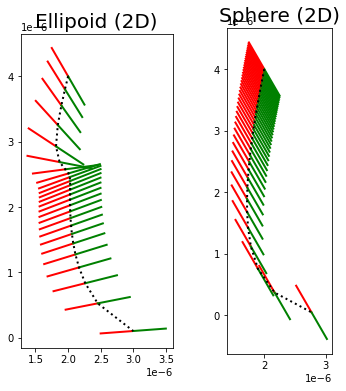

In [2]:
def electric_field(x, y):
    return np.r_[func_Ex(x, y)[0], func_Ey(x, y)[0]]

def flow_velocity(x, y):
    return np.r_[0., 0.]

pm_dep = params.__dict__.copy()
pm_dep = Namespace(**pm_dep)

pm_dep.elec = electric_field
pm_dep.vf = flow_velocity
pm_dep.eps_p = epsilon_0*9.5
pm_dep.eps_f = epsilon_0*8.3
pm_dep.sig_p = 600
pm_dep.sig_f = 2e-7
pm_dep.rho_p = 6150
pm_dep.rho_f = 967
pm_dep.mu_f = 1.1e-3
pm_dep.freq = 1e6
pm_dep.a = 0.5e-6/2.
pm_dep.b = 3.0e-6/2.
pm_dep.dt = 0.1e-6

update(pm_dep, show=True)

def check_time(u):
    return True if pct.time_(u) <= 0.001 else False

def check_height(u):
    return True if pct.pos_(u)[1] > 0 else False    

pos0 = 2e-6, 4e-6
ang0 = np.deg2rad(120)

u0 = [0, pos0, (0, 0), ang0, 0]
forces  = [pct.force_dep, pct.force_drag, pct.force_grav]
torques = [pct.torque_dep, pct.torque_drag]
conditions = [check_time, check_height]

# Trace ellipsoid particle
sol1 = pct.trace(u0, forces, torques, pm_dep, conditions)

# Trace sphere particle
a, b = pm_dep.a, pm_dep.b
pm_dep.a = pm_dep.b = (a**2*b)**(1/3)
update(pm_dep, show=False)

sol2 = pct.trace(u0, forces, torques, pm_dep, conditions)

pm_dep.a, pm_dep.b = a, b
update(pm_dep, show=False)

# Plot results:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,6))
ax1 = pct.plot_traj(ax1, sol1, length=1e-6, nskip=100)
ax1.set_title("Ellipoid (2D)", fontsize=20)
ax2 = pct.plot_traj(ax2, sol2, length=1e-6, nskip=100)
ax2.set_title("Sphere (2D)", fontsize=20)
ax1.set_aspect("equal")
ax2.set_aspect("equal")
plt.show()

## 2D Flow Test


# Simulation parameters:
a             = 5e-07
b             = 7e-06
dt            = 1e-05
eps_f         = 1.0
eps_p         = 1.0
freq          = 1000000.0
inertia_long  = 1.8765780117443035e-27
inertia_short = 1.8484293415681386e-25
kcm_long      = 0.0
kcm_short     = 0.0
kdrag_long    = 19.68050752312148
kdrag_short   = 29.216442187982068
ktorq_long    = 75.57333605047712
ktorq_short   = 26.24067669749537
mass          = 1.876578011744303e-14
mu_f          = 1.826627218934911e-05
r             = 14.0
r2            = 196.0
rho_f         = 1.225
rho_p         = 2560
sig_f         = 1.0
sig_p         = 1.0
vf            = <function flow_velocity at 0x000001E580C88678>
vol           = 7.330382858376184e-18

>>> u0 = [0, (0, -0.00165), (0, 0), 1.5707963267948966, 0]
>>> Wait ...
>>> Calculation time: 18.48 [s] /w 20000 [steps]

>>> u0 = [0, (0, -0.00165), (0, 0), 1.5707963267948966, 0]
>>> Wait ...
>>> Calculation time: 19.30 [s] /w 20000 [steps]


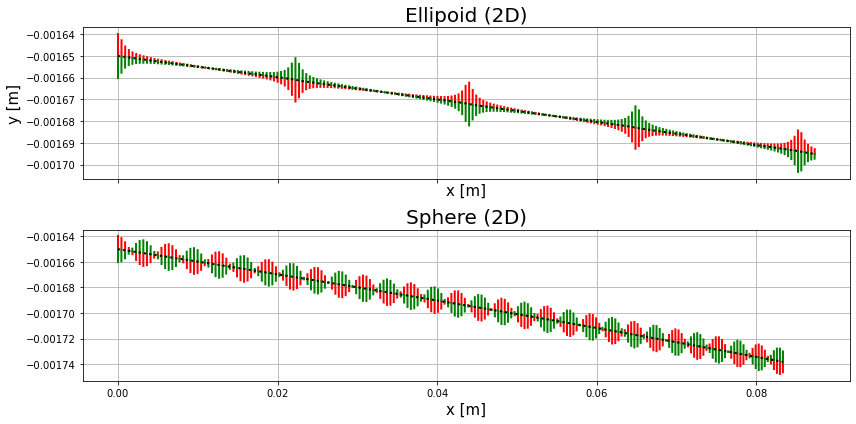

In [3]:
def flow_velocity(x, y, U0=0.6, R=2.1e-3):
    return np.r_[2*U0*(1 - (y/R)**2), 0]

pm_flow = params.__dict__.copy()
pm_flow = Namespace(**pm_flow)

pm_flow.vf = flow_velocity
pm_flow.rho_p = 2560
pm_flow.rho_f = 1.225
pm_flow.mu_f = 1.225*0.6*4.2e-3/169
pm_flow.a = 0.5e-6
pm_flow.b = pm_flow.a*14
pm_flow.dt = 10e-6

update(pm_flow, show=True)

def check_time(u):
    return True if pct.time_(u) <= 0.2 else False

def check_height(u):
    return True if pct.pos_(u)[1] > -2.1e-3 else False

pos0 = 0, -1.65e-3
ang0 = np.deg2rad(90)

u0 = [0, pos0, (0, 0), ang0, 0]
forces  = [pct.force_drag, pct.force_grav]
torques = [pct.torque_drag]
conditions = [check_time, check_height]

# Trace ellipsoid particle
sol1 = pct.trace(u0, forces, torques, pm_flow, conditions)

# Trace sphere particle
a, b = pm_flow.a, pm_flow.b
pm_flow.a = pm_flow.b = (a**2*b)**(1/3)
update(pm_flow, show=False)

sol2 = pct.trace(u0, forces, torques, pm_flow, conditions)

pm_flow.a, pm_flow.b = a, b
update(pm_flow, show=False)

# Plot results:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6), sharex=True)
ax1 = pct.plot_traj(ax1, sol1, length=20e-6, nskip=100)
ax1.set_title("Ellipoid (2D)", fontsize=20)
ax1.set_ylabel("y [m]", fontsize=15)
ax2 = pct.plot_traj(ax2, sol2, length=20e-6, nskip=100)
ax2.set_title("Sphere (2D)", fontsize=20)

for ax in (ax1, ax2):
    ax.set_xlabel("x [m]", fontsize=15)
    ax.grid()

fig.tight_layout()
plt.show()